<a href="https://colab.research.google.com/github/PocachipMind/MS-AI-School/blob/main/3.Deep%20Learning/%EB%A1%9C%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# 로이더 기사 데이터 셋을 로딩합니다.

from keras.datasets import reuters
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words= 10000)

In [82]:
train_data.shape

(8982,)

In [83]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [84]:
# 기사내용 바꿔보기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [85]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [86]:
train_labels[0]

3

In [87]:
# 데이터의 준비

def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# 데이터의 변환 ( 실제 데이터 변환 )

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [88]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [89]:
# 라벨 데이터 엔코딩 - 이렇게 변환 가능하다는걸 보여주기 위한 코드일뿐뿐

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [90]:
# categorical 데이터로 변환 - 보통 이렇게 사용함
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [91]:
# 신경망을 구성합니다.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
# 훈련 데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [95]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.6431 - accuracy: 0.5545 - val_loss: 1.7522 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 1.4184 - accuracy: 0.7107 - val_loss: 1.3045 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.0433 - accuracy: 0.7790 - val_loss: 1.1326 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.8241 - accuracy: 0.8275 - val_loss: 1.0269 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6560 - accuracy: 0.8667 - val_loss: 0.9547 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5270 - accuracy: 0.8926 - val_loss: 0.9229 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.4274 - accuracy: 0.9129 - val_loss: 0.8933 - val_accuracy: 0.8230
Epoch 8/20
16

In [96]:
# 학습 결과를 가져온다. 
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

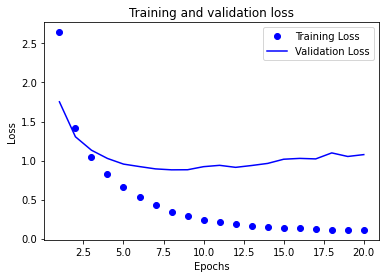

In [97]:
# 결과를 시각화 한다. 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [98]:
# 중간 레이어 극단적으로 줄여보기

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 84ms/step - loss: 3.4797 - accuracy: 0.2917 - val_loss: 3.1386 - val_accuracy: 0.4000
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 2.8314 - accuracy: 0.4189 - val_loss: 2.6804 - val_accuracy: 0.4120
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 2.3913 - accuracy: 0.4392 - val_loss: 2.3647 - val_accuracy: 0.4360
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 2.0777 - accuracy: 0.4659 - val_loss: 2.1429 - val_accuracy: 0.4640
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 1.8276 - accuracy: 0.4911 - val_loss: 1.9503 - val_accuracy: 0.4710
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 1.5963 - accuracy: 0.5867 - val_loss: 1.7601 - val_accuracy: 0.6440
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 1.3879 - accuracy: 0.7191 - val_loss: 1.6287 - val_accuracy: 0.6680
Epoch 8/20
16

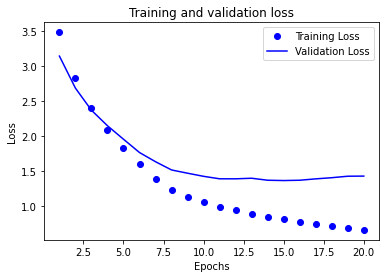

In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [100]:
# 중간 레이어 극단적으로 늘려려보기

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 133ms/step - loss: 2.2160 - accuracy: 0.4861 - val_loss: 1.4435 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.2431 - accuracy: 0.7100 - val_loss: 1.1779 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 0.9130 - accuracy: 0.7900 - val_loss: 1.0705 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 65ms/step - loss: 0.7115 - accuracy: 0.8284 - val_loss: 0.9571 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.5369 - accuracy: 0.8661 - val_loss: 0.9608 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.4179 - accuracy: 0.8986 - val_loss: 0.9029 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 65ms/step - loss: 0.3197 - accuracy: 0.9242 - val_loss: 0.9981 - val_accuracy: 0.7940
Epoch 8/20
1

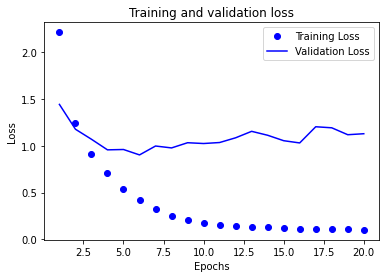

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()